In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
99,363 cases (7 day average) as of Sat 25 Dec, +1,821.6 since Thu 23 Dec
1,429 hospitalised (7 day average) as of Tue 28 Dec, +239.1 since Sun 26 Dec
82 died (7 day average) as of Sat 25 Dec, -4.4 since Thu 23 Dec


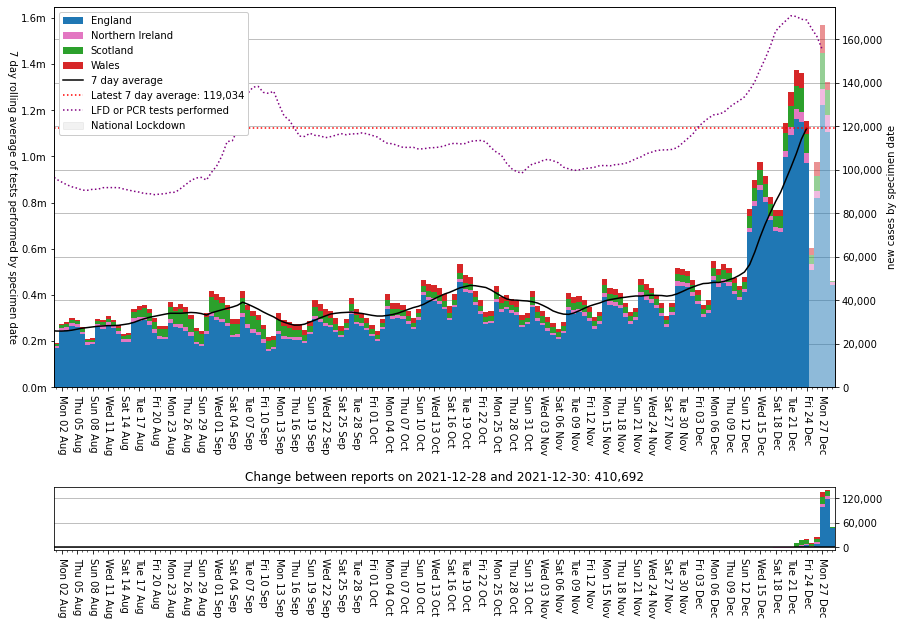

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

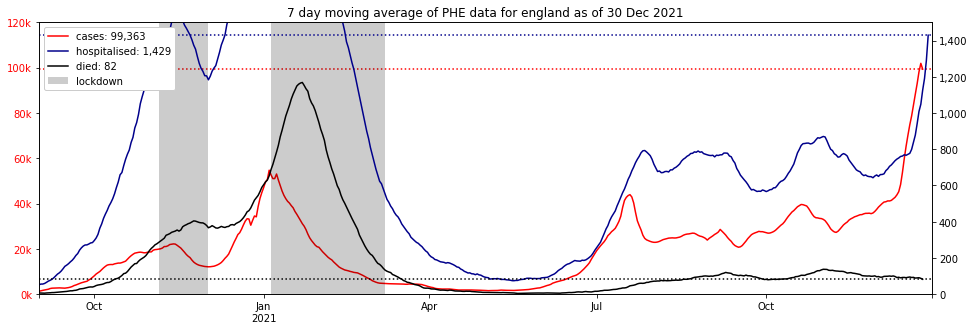

In [31]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=120_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=1500)

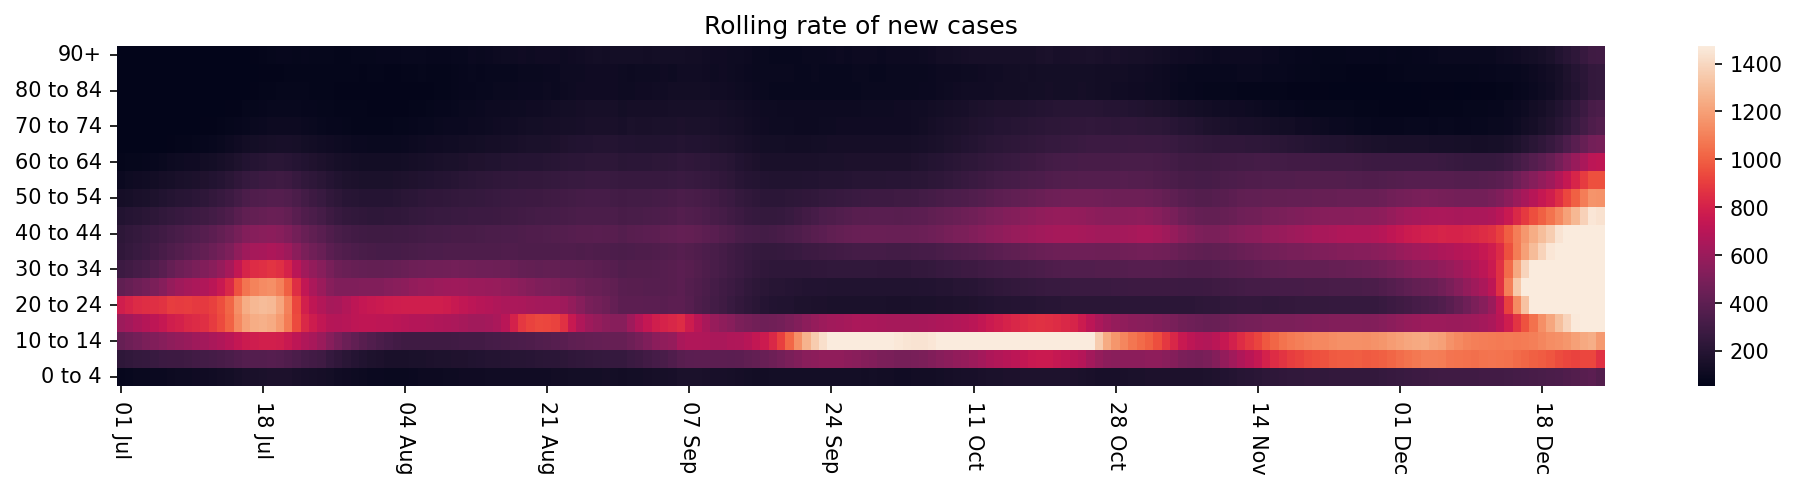

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

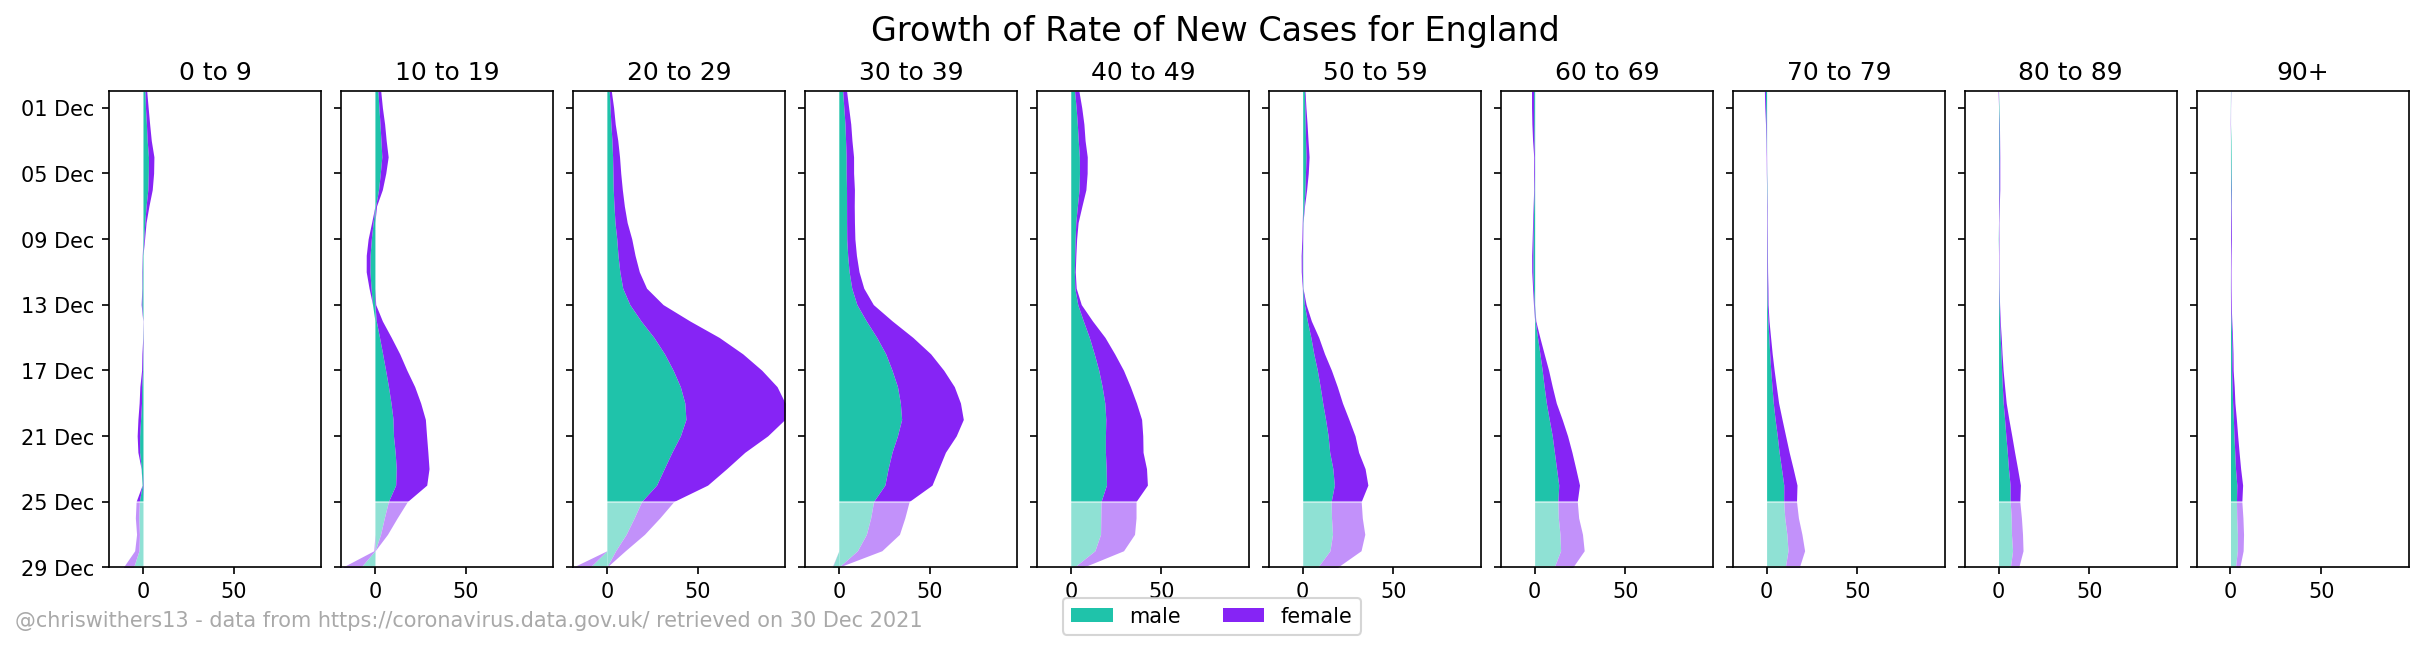

In [6]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

In [7]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

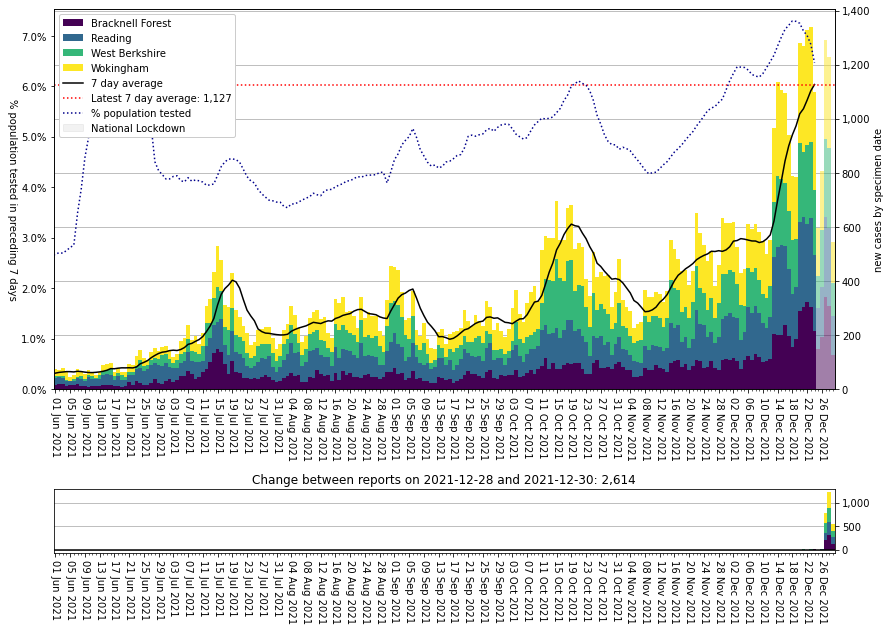

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

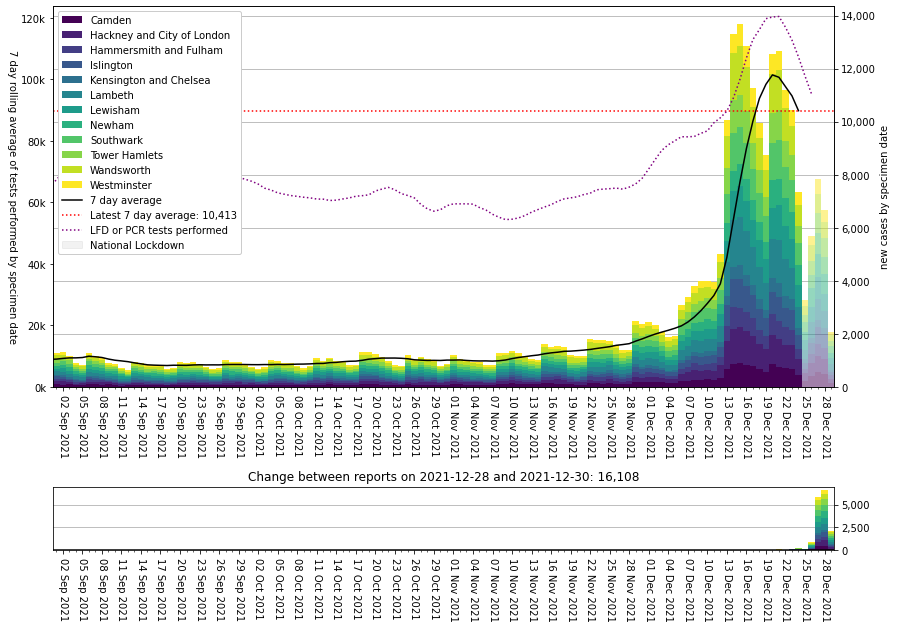

In [9]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [10]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
N09000005  Derry City and Strabane         2632.135586   
N09000006      Fermanagh and Omagh         2119.304582   
E06000034                 Thurrock         2051.726215   
E08000006                  Salford         1935.217166   
E08000007                Stockport         1929.296613   
E07000027        Barrow-in-Furness         1925.457501   
E09000004                   Bexley         1896.595472   
N09000003                  Belfast         1887.978762   
E07000075                 Rochford         1883.984983   
E09000029                   Sutton         1878.371109   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
N09000005                  3982.0    2021-12-28  
N09000006                  2488.0    2021-12-28  
E06000034                  3577.0    2021-12-28  
E08000006                  5009.0    2021-12-28  
E08000007                  5661.0    2021-12-28  
E07000027                  1291.0    2021-12-28  
E09000004                  4709.0    2021-12-28  
N09000003                  6486.0    2021-12-28  
E07000075                  1646.0    2021-12-28  
E09000029                  3876.0    2021-12-28

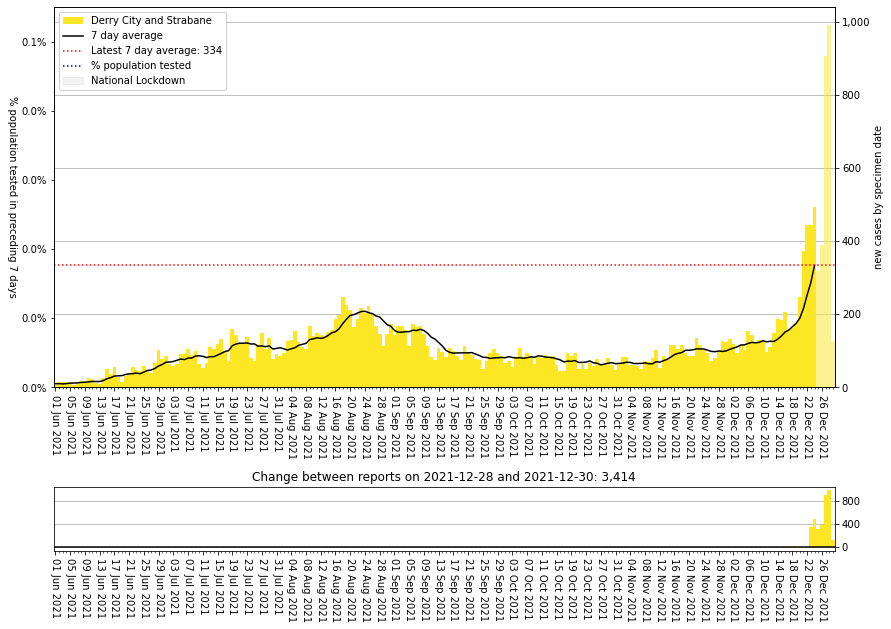

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                   
E08000025         Birmingham         1065.758406                 12169.0   
E08000035              Leeds         1246.691942                  9888.0   
S12000049       Glasgow City         1547.258024                  9796.0   
E08000003         Manchester         1718.343589                  9500.0   
E08000012          Liverpool         1584.404528                  7891.0   
E08000019          Sheffield         1285.451216                  7518.0   
E09000008            Croydon         1871.428202                  7237.0   
S12000036  City of Edinburgh         1371.611453                  7200.0   
E06000023   Bristol, City of         1440.727529                  6676.0   
N09000003            Belfast         1887.978762                  6486.0   

          Specimen date  
areaCode                 
E08000025    2021-12-28  
E08000035    2021-12-28  
S12000049    2021-12-28  
E08000003    2021-12-28  
E08000012    2021-12-28  
E08000019    2021-12-28  
E09000008    2021-12-28  
S12000036    2021-12-28  
E06000023    2021-12-28  
N09000003    2021-12-28

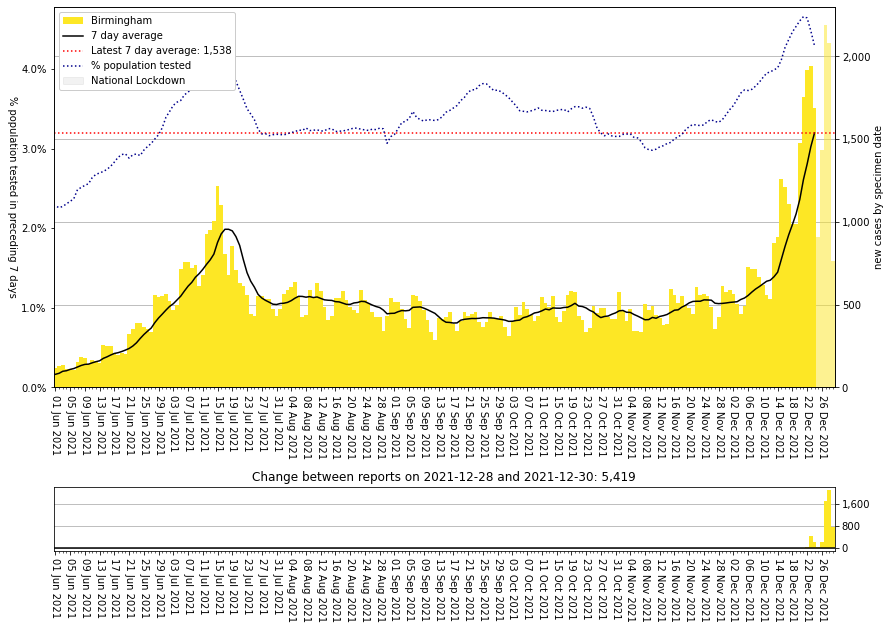

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

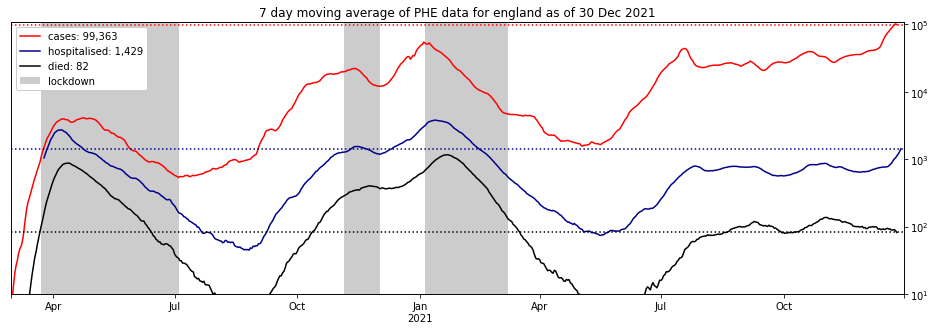

In [15]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

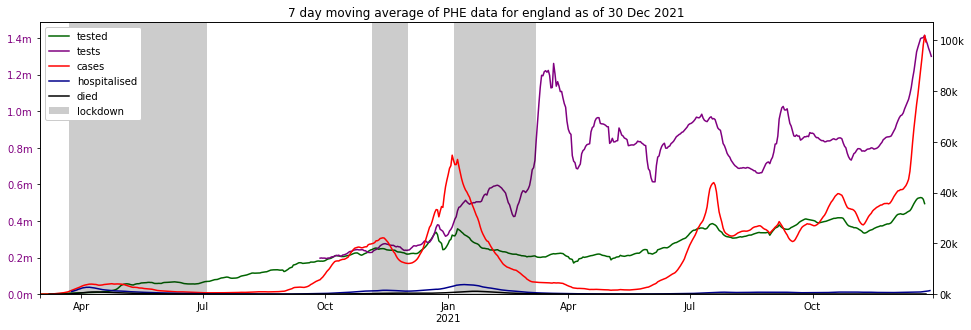

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

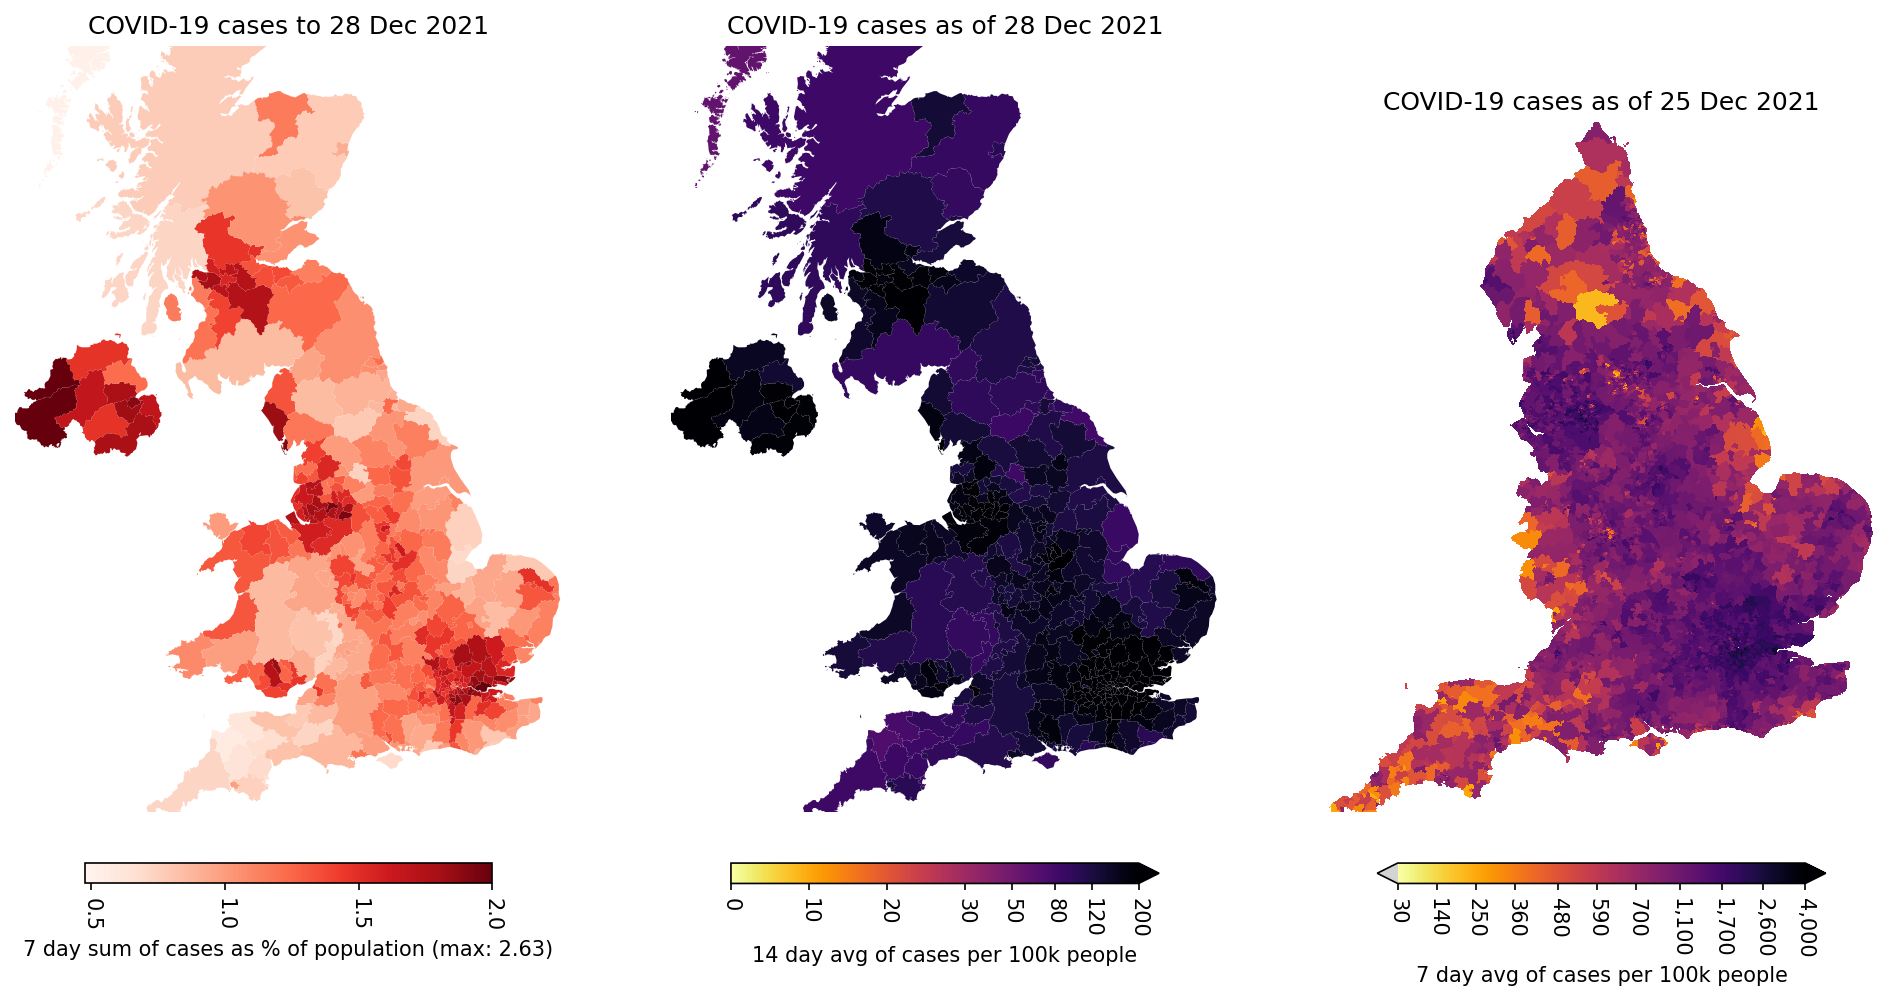

Loading BokehJS ...

In [17]:
case_maps(sum_vmax=2, exclude_days=1)